In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

pd.set_option('display.max_columns', None)
p2425 = pd.read_csv("./data/season-2425.csv")
p2324 = pd.read_csv("./data/season-2324.csv")
p2223 = pd.read_csv("./data/season-2223.csv")
p2122 = pd.read_csv("./data/season-2122.csv")
p2021 = pd.read_csv("./data/season-2021.csv")
p1920 = pd.read_csv("./data/season-1920.csv")
p1819 = pd.read_csv("./data/season-1819.csv")
p1718 = pd.read_csv("./data/season-1718.csv")
p1617 = pd.read_csv("./data/season-1617.csv")
p1516 = pd.read_csv("./data/season-1516.csv")
p1415 = pd.read_csv("./data/season-1415.csv")

Prem_DF = pd.concat([p2425, p2324, p2223, p2122, p2021, p1920, p1819, p1718, p1617, p1516, p1415])
Prem_DF.reset_index(inplace=True)

In [2]:
# HomeTeam -> string --> Home Team
# AwayTeam -> string --> Away Team
# FTHG -> integer --> Full Time Home Team Goals
# FTAG -> integer --> Full Time Away Team Goals
# FTR -> string --> Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG -> integer --> Half Time Home Team Goals
# HTAG -> integer --> Half Time Away Team Goals
# HTR -> string --> Half Time Result (H=Home Win, D=Draw, A=Away Win)
# Referee -> string --> Match Referee
# HS -> integer --> Home Team Shots
# AS -> integer --> Away Team Shots
# HST -> integer --> Home Team Shots on Target
# AST -> integer --> Away Team Shots on Target
# HF -> integer --> Home Team Fouls Committed
# AF -> integer --> Away Team Fouls Committed
# HC -> integer --> Home Team Corners
# AC -> integer --> Away Team Corners
# HY -> integer --> Home Team Yellow Cards
# AY -> integer --> Away Team Yellow Cards
# HR -> integer --> Home Team Red Cards
# AR -> integer --> Away Team Red Cards


In [3]:
Prem_DF


,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,375,24/05/15,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,376,24/05/15,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,377,24/05/15,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,378,24/05/15,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [4]:
# DATA CLEANING:
# Setting up the DataFrame so it is more suitable for answering my questions, checking for na values and duplicates as well as reformating some columns

In [5]:
Prem_DF.drop(columns="index", inplace=True)

In [6]:
Prem_DF

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,24/05/15,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,24/05/15,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,24/05/15,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,24/05/15,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [7]:
Prem_DF.isna().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [8]:
Prem_DF.drop_duplicates()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,24/05/15,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,24/05/15,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,24/05/15,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,24/05/15,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [9]:
Prem_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029 entries, 0 to 4028
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4029 non-null   object
 1   HomeTeam  4029 non-null   object
 2   AwayTeam  4029 non-null   object
 3   FTHG      4029 non-null   int64 
 4   FTAG      4029 non-null   int64 
 5   FTR       4029 non-null   object
 6   HTHG      4029 non-null   int64 
 7   HTAG      4029 non-null   int64 
 8   HTR       4029 non-null   object
 9   Referee   4029 non-null   object
 10  HS        4029 non-null   int64 
 11  AS        4029 non-null   int64 
 12  HST       4029 non-null   int64 
 13  AST       4029 non-null   int64 
 14  HF        4029 non-null   int64 
 15  AF        4029 non-null   int64 
 16  HC        4029 non-null   int64 
 17  AC        4029 non-null   int64 
 18  HY        4029 non-null   int64 
 19  AY        4029 non-null   int64 
 20  HR        4029 non-null   int64 
 21  AR        4029

In [10]:
Prem_DF.rename(columns={"Date": "date", "HomeTeam": "home", "AwayTeam": "away", "FTHG": "fthg", "FTAG": "ftag", "FTR": "ftr", "HTHG": "hthg", "HTAG": "htag", "HTR": "htr", "Referee": "referee", 
                        "HS": "hs", "AS": "as", "HST": "hst", "AST": "ast", "HF": "hf", "AF": "af", "HC": "hc", "AC": "ac", "HY": "hy", "AY": "ay", "HR": "hr", "AR": "ar"}, inplace=True)

In [11]:
# I forgot the 'inplace=True' and so the rename wasn't working properly, I included the line and then used the print statement below to check renaming happened in the intended way.

In [12]:
print(Prem_DF.columns)

Index(['date', 'home', 'away', 'fthg', 'ftag', 'ftr', 'hthg', 'htag', 'htr',
       'referee', 'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac', 'hy', 'ay',
       'hr', 'ar'],
      dtype='object')


In [13]:
Prem_DF["date"] = pd.to_datetime(Prem_DF["date"])
Prem_DF

C:\Users\tango\AppData\Local\Temp\ipykernel_1812\141959832.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Prem_DF["date"] = pd.to_datetime(Prem_DF["date"])


,date,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024-08-16,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024-08-17,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024-08-17,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024-08-17,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024-08-17,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2015-05-24,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,2015-05-24,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,2015-05-24,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,2015-05-24,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [14]:
Prem_DF.insert(1, "year", Prem_DF["date"].dt.year)
Prem_DF

,date,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024-08-16,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024-08-17,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024-08-17,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024-08-17,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024-08-17,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2015-05-24,2015,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,2015-05-24,2015,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,2015-05-24,2015,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,2015-05-24,2015,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [15]:
Prem_DF["year"].max()

np.int32(2025)

In [16]:
# Making a new 'year' column where the date was, I don't need the full date for my analysis as I am simply interested in the statistics by year.

In [17]:
Prem_DF.drop(columns="date", inplace=True)
Prem_DF

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2015,Hull,Man United,0,0,D,0,0,D,L Probert,16,7,6,1,12,15,8,1,2,2,0,1
4025,2015,Leicester,QPR,5,1,H,2,0,H,M Oliver,22,18,7,2,7,6,5,6,0,0,0,0
4026,2015,Man City,Southampton,2,0,H,1,0,H,C Foy,15,13,6,4,13,8,8,4,1,1,0,0
4027,2015,Newcastle,West Ham,2,0,H,0,0,D,M Atkinson,17,4,4,1,9,9,2,3,2,1,0,0


In [18]:
Prem_DF = Prem_DF.sort_values(by="year", ascending=False)
Prem_DF.reset_index(inplace=True)

In [19]:
Prem_DF.drop(columns="index", inplace=True)

In [20]:
Prem_DF

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2025,Ipswich,Man City,0,6,A,0,3,A,S Barrott,8,17,4,9,4,7,4,7,0,1,0,0
1,2025,Chelsea,Wolves,3,1,H,1,1,D,S Hooper,19,9,7,4,8,14,3,6,4,2,0,0
2,2025,Bournemouth,Nott'm Forest,5,0,H,1,0,H,C Pawson,16,18,10,4,9,12,3,9,2,3,0,0
3,2025,Brighton,Everton,0,1,A,0,1,A,T Robinson,16,3,1,1,8,11,9,1,3,4,0,0
4,2025,Liverpool,Ipswich,4,1,H,3,0,H,M Salisbury,16,3,6,3,10,11,3,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2014,Liverpool,Southampton,2,1,H,1,0,H,M Clattenburg,12,12,5,6,8,11,2,6,1,2,0,0
4025,2014,Newcastle,Man City,0,2,A,0,1,A,M Atkinson,12,13,0,5,8,11,3,3,1,5,0,0
4026,2014,Burnley,Chelsea,1,3,A,1,3,A,M Oliver,9,11,2,3,6,7,4,3,1,1,0,0
4027,2014,Aston Villa,Newcastle,0,0,D,0,0,D,M Dean,9,11,0,4,11,8,7,7,4,0,0,1


In [21]:
# Creating a copy of the main DF in the event later on in the project I want to experiment with exploration and end up doing accidental collateral.

In [22]:
Prem_DF_Copy = Prem_DF

In [23]:
Prem_DF_Copy

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2025,Ipswich,Man City,0,6,A,0,3,A,S Barrott,8,17,4,9,4,7,4,7,0,1,0,0
1,2025,Chelsea,Wolves,3,1,H,1,1,D,S Hooper,19,9,7,4,8,14,3,6,4,2,0,0
2,2025,Bournemouth,Nott'm Forest,5,0,H,1,0,H,C Pawson,16,18,10,4,9,12,3,9,2,3,0,0
3,2025,Brighton,Everton,0,1,A,0,1,A,T Robinson,16,3,1,1,8,11,9,1,3,4,0,0
4,2025,Liverpool,Ipswich,4,1,H,3,0,H,M Salisbury,16,3,6,3,10,11,3,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2014,Liverpool,Southampton,2,1,H,1,0,H,M Clattenburg,12,12,5,6,8,11,2,6,1,2,0,0
4025,2014,Newcastle,Man City,0,2,A,0,1,A,M Atkinson,12,13,0,5,8,11,3,3,1,5,0,0
4026,2014,Burnley,Chelsea,1,3,A,1,3,A,M Oliver,9,11,2,3,6,7,4,3,1,1,0,0
4027,2014,Aston Villa,Newcastle,0,0,D,0,0,D,M Dean,9,11,0,4,11,8,7,7,4,0,0,1


In [24]:
# Question 1: *Which team has scored the most goals in the past decade?*
# Variables to focus on: 'year', 'home', 'away', 'fthg', 'ftag'

In [25]:
def cycleTeam(year, team):
    TeamYear_DF = Prem_DF.loc[(Prem_DF["year"] == year) & (Prem_DF["home"] == team) + (Prem_DF["away"] == team)]
    return TeamYear_DF

cycleTeam(2017, "Arsenal")


,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
2685,2017,Stoke,Arsenal,1,4,A,0,1,A,M Dean,10,10,4,6,13,7,7,6,1,2,0,0
2697,2017,Tottenham,Arsenal,2,0,H,0,0,D,M Oliver,20,12,11,4,7,15,14,5,1,3,0,0
2701,2017,Arsenal,Everton,3,1,H,2,0,H,M Oliver,17,22,9,7,10,15,4,6,2,4,1,0
2710,2017,Crystal Palace,Arsenal,2,3,A,0,1,A,M Oliver,16,16,2,9,12,7,5,4,0,1,0,0
2720,2017,West Ham,Arsenal,0,0,D,0,0,D,J Moss,6,22,0,3,9,9,1,7,1,0,0,0
2729,2017,Arsenal,Liverpool,3,3,D,0,1,A,M Atkinson,11,14,4,9,9,11,7,8,1,0,0,0
2733,2017,West Brom,Arsenal,1,1,D,0,0,D,M Dean,14,14,3,4,14,9,5,6,3,3,0,0
2751,2017,Arsenal,Newcastle,1,0,H,1,0,H,S Attwell,23,10,5,2,13,9,7,5,2,1,0,0
2755,2017,Arsenal,Huddersfield,5,0,H,1,0,H,G Scott,21,7,7,2,10,12,7,2,0,1,0,0
2762,2017,Southampton,Arsenal,1,1,D,1,0,H,R Madley,6,11,3,6,12,10,4,5,2,2,0,0


In [26]:
totalHomeGoals = cycleTeam(2017, "Arsenal")[cycleTeam(2017, "Arsenal")["home"] == "Arsenal"]["fthg"].sum()
totalAwayGoals = cycleTeam(2017, "Arsenal")[cycleTeam(2017, "Arsenal")["away"] == "Arsenal"]["ftag"].sum()
totalGoals = totalHomeGoals + totalAwayGoals

Arsenal2017 = {
    "Home_Goals": int(totalHomeGoals),
    "Away_Goals": int(totalAwayGoals),
    "Total_Goals": int(totalGoals)
}
print(Arsenal2017)

{'Home_Goals': 45, 'Away_Goals': 31, 'Total_Goals': 76}


In [27]:
# Combining the CycleTeam functions and creating a new one 'findTotalGoals' so we can just input a year and team to find the total goals for that year!

In [28]:
def cycleTeam(year, team):
    TeamYear_DF = Prem_DF.loc[(Prem_DF["year"] == year) & (Prem_DF["home"] == team) + (Prem_DF["away"] == team)]
    return TeamYear_DF

def findTotalGoals(year, team):
    totalHomeGoals = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["fthg"].sum()
    totalAwayGoals = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["ftag"].sum()
    totalGoals = totalHomeGoals + totalAwayGoals
    objectName = f"{team}{year}"

    # objectName = {
    #     "Year": year,
    #     "Team": team,
    #     "Home_Goals": int(totalHomeGoals),
    #     "Away_Goals": int(totalAwayGoals),
    #     "Total_Goals": int(totalGoals)
    # }
    return (team, year, int(totalHomeGoals), int(totalAwayGoals), int(totalGoals))

findTotalGoals(2014, "Arsenal")

('Arsenal', 2014, 18, 16, 34)

In [29]:
teams_list = set()
years_list = set()
for index, entry in Prem_DF.iterrows():
    teams_list.add(entry["home"])
    years_list.add(entry["year"])

teams_list = sorted(teams_list)
years_list = sorted(years_list)

print(years_list)

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [30]:
# Now having both a list of all the years and all the teams that played across the decade, I should, in theory be able to cycle these values and input them
# into my shiny new 'findTotalGoals' function!

In [31]:
Goal_Counts = []
def findGoalCounts():
    for year in years_list:
        for team in teams_list:
            Goal_Counts.append(findTotalGoals(year, team))
    return Goal_Counts

tg_by_year = pd.DataFrame(findGoalCounts())
tg_by_year.rename(columns = {0: "Team", 1: "Year", 2: "Total_HG", 3: "Total_AG", 4: "Total_Goals"}, inplace=True)

In [32]:
tg_by_year

,Team,Year,Total_HG,Total_AG,Total_Goals
0,Arsenal,2014,18,16,34
1,Aston Villa,2014,7,4,11
2,Bournemouth,2014,0,0,0
3,Brentford,2014,0,0,0
4,Brighton,2014,0,0,0
...,...,...,...,...,...
415,Tottenham,2025,2,3,5
416,Watford,2025,0,0,0
417,West Brom,2025,0,0,0
418,West Ham,2025,3,2,5


In [33]:
tg_by_year[tg_by_year["Team"] == "Arsenal"]["Total_Goals"].sum()

np.int64(755)

In [34]:
tg_by_decade = []
for team in teams_list:
    tg_by_decade.append({
        "Team": team, 
        "Total_Goals": int(tg_by_year[tg_by_year["Team"] == team]["Total_Goals"].sum())
        })

tg_by_decade


[{'Team': 'Arsenal', 'Total_Goals': 755},
 {'Team': 'Aston Villa', 'Total_Goals': 367},
 {'Team': 'Bournemouth', 'Total_Goals': 373},
 {'Team': 'Brentford', 'Total_Goals': 204},
 {'Team': 'Brighton', 'Total_Goals': 352},
 {'Team': 'Burnley', 'Total_Goals': 299},
 {'Team': 'Cardiff', 'Total_Goals': 34},
 {'Team': 'Chelsea', 'Total_Goals': 705},
 {'Team': 'Crystal Palace', 'Total_Goals': 477},
 {'Team': 'Everton', 'Total_Goals': 494},
 {'Team': 'Fulham', 'Total_Goals': 205},
 {'Team': 'Huddersfield', 'Total_Goals': 50},
 {'Team': 'Hull', 'Total_Goals': 70},
 {'Team': 'Ipswich', 'Total_Goals': 21},
 {'Team': 'Leeds', 'Total_Goals': 152},
 {'Team': 'Leicester', 'Total_Goals': 542},
 {'Team': 'Liverpool', 'Total_Goals': 828},
 {'Team': 'Luton', 'Total_Goals': 52},
 {'Team': 'Man City', 'Total_Goals': 956},
 {'Team': 'Man United', 'Total_Goals': 637},
 {'Team': 'Middlesbrough', 'Total_Goals': 27},
 {'Team': 'Newcastle', 'Total_Goals': 487},
 {'Team': 'Norwich', 'Total_Goals': 88},
 {'Team': 

In [35]:
Question_One = pd.DataFrame(tg_by_decade)
Question_One

,Team,Total_Goals
0,Arsenal,755
1,Aston Villa,367
2,Bournemouth,373
3,Brentford,204
4,Brighton,352
5,Burnley,299
6,Cardiff,34
7,Chelsea,705
8,Crystal Palace,477
9,Everton,494


In [36]:
Question_One["Total_Goals"].max()
Question_One["Total_Goals"].idxmax()
Question_One.iloc[18]
print(f"The highest scoring team in the last decade [2014-2025] is {Question_One.iloc[18]["Team"]} with a grand total of: {Question_One["Total_Goals"].max()} goals scored!")

The highest scoring team in the last decade [2014-2025] is Man City with a grand total of: 956 goals scored!


In [37]:
Question_One = Question_One.sort_values(by="Total_Goals", ascending=False)

In [38]:
Question_One.reset_index(drop=True, inplace=True)

In [39]:
Question_One

,Team,Total_Goals
0,Man City,956
1,Liverpool,828
2,Arsenal,755
3,Tottenham,742
4,Chelsea,705
5,Man United,637
6,West Ham,557
7,Leicester,542
8,Everton,494
9,Newcastle,487


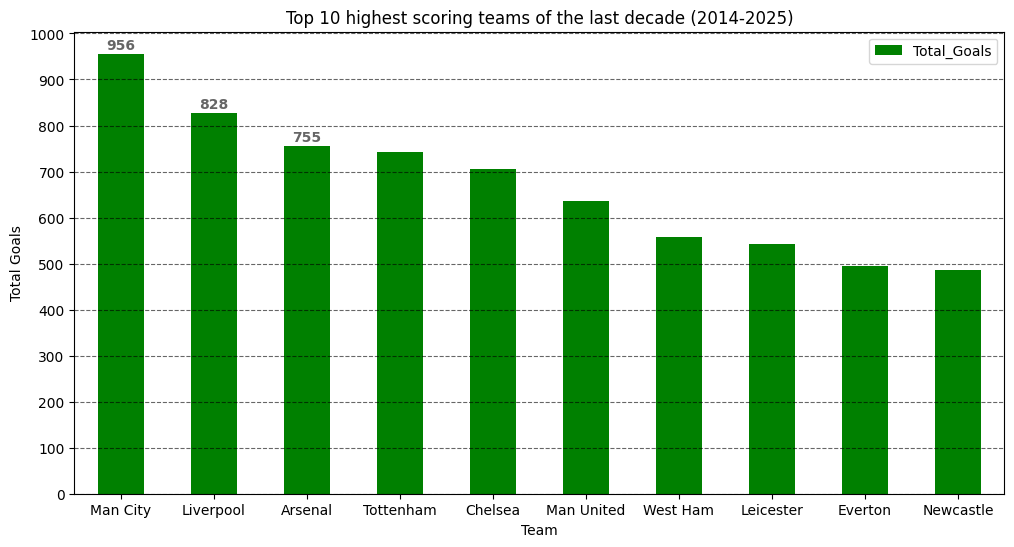

In [137]:
Question_One_Top10 = Question_One.head(10)
Top_10 = Question_One_Top10.plot(x="Team", y="Total_Goals", kind="bar", color="green", figsize=(12,6))

plt.xticks(rotation=0)
plt.yticks(range(0, Question_One_Top10["Total_Goals"].max() + 100, 100))
plt.xlabel("Team")
plt.ylabel("Total Goals")
plt.title("Top 10 highest scoring teams of the last decade (2014-2025)")
plt.grid(axis="y", linestyle="--", color="black", alpha=0.6)

for i, value in enumerate(Question_One_Top10["Total_Goals"]):
    if i < 3:
        plt.text(i, value + 10, str(value), ha="center", fontsize=10, fontweight="bold", color="black", alpha=0.6)
plt.show()

In [41]:
Prem_DF.head()

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2025,Ipswich,Man City,0,6,A,0,3,A,S Barrott,8,17,4,9,4,7,4,7,0,1,0,0
1,2025,Chelsea,Wolves,3,1,H,1,1,D,S Hooper,19,9,7,4,8,14,3,6,4,2,0,0
2,2025,Bournemouth,Nott'm Forest,5,0,H,1,0,H,C Pawson,16,18,10,4,9,12,3,9,2,3,0,0
3,2025,Brighton,Everton,0,1,A,0,1,A,T Robinson,16,3,1,1,8,11,9,1,3,4,0,0
4,2025,Liverpool,Ipswich,4,1,H,3,0,H,M Salisbury,16,3,6,3,10,11,3,4,0,2,0,0


In [42]:
# Question 2:
# Which team(s) in the past decade, win most of their games at home and which team(s) win most of their games away?
# Looking at total % of wins that are at home/away
# Likely using a pie chart to depict this, total wins - home% / away%
# Variables to focus on: year, home, away, ftr

In [43]:
Home_Winners = Prem_DF[Prem_DF["ftr"] == "H"]["home"]
Away_Winners = Prem_DF[Prem_DF["ftr"] == "A"]["away"]

Home_Winners.reset_index(drop=True, inplace=True)
Away_Winners.reset_index(drop=True, inplace=True)

# print(int(Home_Winners.value_counts()["Arsenal"]), int(Away_Winners.value_counts()["Arsenal"]))

total_wins = []
def totalWins():
    for team in teams_list:
        total_wins.append(
            {
                "Team": team,
                "Home_Wins": int(Home_Winners.value_counts()[team]),
                "Away_Wins": int(Away_Winners.value_counts()[team]),
                "Total_Wins": int(Home_Winners.value_counts()[team] + Away_Winners.value_counts()[team])
            }
        )
    return (total_wins)
print(totalWins())


[{'Team': 'Arsenal', 'Home_Wins': 134, 'Away_Wins': 92, 'Total_Wins': 226}, {'Team': 'Aston Villa', 'Home_Wins': 57, 'Away_Wins': 42, 'Total_Wins': 99}, {'Team': 'Bournemouth', 'Home_Wins': 53, 'Away_Wins': 38, 'Total_Wins': 91}, {'Team': 'Brentford', 'Home_Wins': 29, 'Away_Wins': 18, 'Total_Wins': 47}, {'Team': 'Brighton', 'Home_Wins': 48, 'Away_Wins': 38, 'Total_Wins': 86}, {'Team': 'Burnley', 'Home_Wins': 47, 'Away_Wins': 33, 'Total_Wins': 80}, {'Team': 'Cardiff', 'Home_Wins': 6, 'Away_Wins': 4, 'Total_Wins': 10}, {'Team': 'Chelsea', 'Home_Wins': 111, 'Away_Wins': 99, 'Total_Wins': 210}, {'Team': 'Crystal Palace', 'Home_Wins': 66, 'Away_Wins': 59, 'Total_Wins': 125}, {'Team': 'Everton', 'Home_Wins': 86, 'Away_Wins': 49, 'Total_Wins': 135}, {'Team': 'Fulham', 'Home_Wins': 29, 'Away_Wins': 19, 'Total_Wins': 48}, {'Team': 'Huddersfield', 'Home_Wins': 8, 'Away_Wins': 4, 'Total_Wins': 12}, {'Team': 'Hull', 'Home_Wins': 13, 'Away_Wins': 4, 'Total_Wins': 17}, {'Team': 'Ipswich', 'Home_Wins

In [44]:
Question_Two = pd.DataFrame(total_wins)
Question_Two

,Team,Home_Wins,Away_Wins,Total_Wins
0,Arsenal,134,92,226
1,Aston Villa,57,42,99
2,Bournemouth,53,38,91
3,Brentford,29,18,47
4,Brighton,48,38,86
5,Burnley,47,33,80
6,Cardiff,6,4,10
7,Chelsea,111,99,210
8,Crystal Palace,66,59,125
9,Everton,86,49,135


In [45]:
Question_Two["Home%"] = round((Question_Two["Home_Wins"] / Question_Two["Total_Wins"]), 2) * 100
Question_Two["Away%"] = round((Question_Two["Away_Wins"] / Question_Two["Total_Wins"]), 2) * 100

In [46]:
Question_Two.sort_values(by="Home%", ascending=False)

,Team,Home_Wins,Away_Wins,Total_Wins,Home%,Away%
20,Middlesbrough,4,1,5,80.0,20.0
12,Hull,13,4,17,76.0,24.0
24,QPR,6,2,8,75.0,25.0
25,Sheffield United,17,7,24,71.0,29.0
22,Norwich,13,6,19,68.0,32.0
17,Luton,4,2,6,67.0,33.0
11,Huddersfield,8,4,12,67.0,33.0
29,Swansea,31,17,48,65.0,35.0
27,Stoke,30,17,47,64.0,36.0
9,Everton,86,49,135,64.0,36.0


In [47]:
Prem_DF[Prem_DF["home"] == "Middlesbrough"]

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
2688,2017,Middlesbrough,Southampton,1,2,A,0,1,A,A Taylor,14,14,3,4,19,11,6,3,3,0,0,0
2698,2017,Middlesbrough,Man City,2,2,D,1,0,H,K Friend,14,22,6,4,9,9,4,11,4,4,0,0
2941,2017,Middlesbrough,Sunderland,1,0,H,1,0,H,M Dean,6,10,2,4,15,11,3,5,3,3,0,0
2951,2017,Middlesbrough,Arsenal,1,2,A,0,1,A,A Taylor,13,12,5,4,11,16,2,4,2,2,0,0
2968,2017,Middlesbrough,Burnley,0,0,D,0,0,D,M Atkinson,12,7,5,2,9,12,4,3,0,3,0,0
2992,2017,Middlesbrough,Man United,1,3,A,0,1,A,J Moss,10,14,3,6,9,8,8,3,1,1,0,0
3027,2017,Middlesbrough,West Ham,1,3,A,1,2,A,M Atkinson,11,13,2,5,7,14,7,5,2,1,0,0
3030,2017,Middlesbrough,Everton,0,0,D,0,0,D,M Dean,9,7,3,3,14,9,5,2,2,0,0,0
3049,2017,Middlesbrough,West Brom,1,1,D,1,1,D,S Attwell,11,16,3,5,12,13,4,2,2,1,0,0
3071,2017,Middlesbrough,Leicester,0,0,D,0,0,D,R Madley,9,10,1,4,10,9,2,2,3,0,0,0


In [48]:
# Well.. this is awkward, according to the analysis Middlesbrough have a tremendous win rate of 80% at home! What an incredible team!!!
# Or it would be... if the sample size wasn't so small. To make it a bit more accurate, we'll take into account
# 'draws' and total games!

In [49]:
Home_Winners = Prem_DF[Prem_DF["ftr"] == "H"]["home"]
Draw_Games_Home = Prem_DF[Prem_DF["ftr"] == "D"]["home"]
Draw_Games_Away = Prem_DF[Prem_DF["ftr"] == "D"]["away"]
Away_Winners = Prem_DF[Prem_DF["ftr"] == "A"]["away"]

Home_Winners.reset_index(drop=True, inplace=True)
Away_Winners.reset_index(drop=True, inplace=True)

total_wins = []
def totalWins():
    for team in teams_list:
        Home_Team = Prem_DF[Prem_DF["home"] == team]["home"]
        Away_Team = Prem_DF[Prem_DF["away"] == team]["away"]
        total_wins.append(
            {
                "Team": team,
                "Home_Wins": int(Home_Winners.value_counts()[team]),
                "Draws": int(Draw_Games_Home.value_counts()[team] + Draw_Games_Away.value_counts()[team]),
                "Away_Wins": int(Away_Winners.value_counts()[team]),
                "Total_Wins": int(Home_Winners.value_counts()[team] + Away_Winners.value_counts()[team]),
                "Total_Games": int(Home_Team.value_counts()[team] + Away_Team.value_counts()[team])
            }
        )
    return (total_wins)

print(totalWins())

[{'Team': 'Arsenal', 'Home_Wins': 134, 'Draws': 82, 'Away_Wins': 92, 'Total_Wins': 226, 'Total_Games': 403}, {'Team': 'Aston Villa', 'Home_Wins': 57, 'Draws': 59, 'Away_Wins': 42, 'Total_Wins': 99, 'Total_Games': 289}, {'Team': 'Bournemouth', 'Home_Wins': 53, 'Draws': 65, 'Away_Wins': 38, 'Total_Wins': 91, 'Total_Games': 289}, {'Team': 'Brentford', 'Home_Wins': 29, 'Draws': 34, 'Away_Wins': 18, 'Total_Wins': 47, 'Total_Games': 137}, {'Team': 'Brighton', 'Home_Wins': 48, 'Draws': 95, 'Away_Wins': 38, 'Total_Wins': 86, 'Total_Games': 289}, {'Team': 'Burnley', 'Home_Wins': 47, 'Draws': 79, 'Away_Wins': 33, 'Total_Wins': 80, 'Total_Games': 304}, {'Team': 'Cardiff', 'Home_Wins': 6, 'Draws': 4, 'Away_Wins': 4, 'Total_Wins': 10, 'Total_Games': 38}, {'Team': 'Chelsea', 'Home_Wins': 111, 'Draws': 96, 'Away_Wins': 99, 'Total_Wins': 210, 'Total_Games': 403}, {'Team': 'Crystal Palace', 'Home_Wins': 66, 'Draws': 105, 'Away_Wins': 59, 'Total_Wins': 125, 'Total_Games': 403}, {'Team': 'Everton', 'Home

In [50]:
Question_Two = pd.DataFrame(total_wins)
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games
0,Arsenal,134,82,92,226,403
1,Aston Villa,57,59,42,99,289
2,Bournemouth,53,65,38,91,289
3,Brentford,29,34,18,47,137
4,Brighton,48,95,38,86,289
5,Burnley,47,79,33,80,304
6,Cardiff,6,4,4,10,38
7,Chelsea,111,96,99,210,403
8,Crystal Palace,66,105,59,125,403
9,Everton,86,107,49,135,402


In [51]:
Question_Two["HomeWin%"] = round((Question_Two["Home_Wins"] / Question_Two["Total_Wins"]), 2) * 100
Question_Two["AwayWin%"] = round((Question_Two["Away_Wins"] / Question_Two["Total_Wins"]), 2) * 100
Question_Two["WinRate%"] = round((Question_Two["Total_Wins"] / Question_Two["Total_Games"]), 2) * 100
# Question_Two.drop(columns="WinRate%", inplace=True)
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%
0,Arsenal,134,82,92,226,403,59.0,41.0,56.0
1,Aston Villa,57,59,42,99,289,58.0,42.0,34.0
2,Bournemouth,53,65,38,91,289,58.0,42.0,31.0
3,Brentford,29,34,18,47,137,62.0,38.0,34.0
4,Brighton,48,95,38,86,289,56.0,44.0,30.0
5,Burnley,47,79,33,80,304,59.0,41.0,26.0
6,Cardiff,6,4,4,10,38,60.0,40.0,26.0
7,Chelsea,111,96,99,210,403,53.0,47.0,52.0
8,Crystal Palace,66,105,59,125,403,53.0,47.0,31.0
9,Everton,86,107,49,135,402,64.0,36.0,34.0


In [52]:
# Okay this is a bit better, but we can see Middlesbrough, Hull, QPR, Luton and many others haven't played a full seasons worth of games! This is either
# due to incomplete data, or they're part of the current 2025 season. So we want the stats to reflect
# teams that have AT LEAST played an entire seasons worth of games (38+)

In [53]:
# Great! Now lets see which teams actually have the highest home% win rate and away% win rate in a more fair and accurate manner!

In [54]:
Question_Two.sort_values(by="WinRate%", ascending=False)


,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%
18,Man City,152,62,128,280,403,54.0,46.0,69.0
16,Liverpool,138,94,108,246,402,56.0,44.0,61.0
0,Arsenal,134,82,92,226,403,59.0,41.0,56.0
7,Chelsea,111,96,99,210,403,53.0,47.0,52.0
30,Tottenham,126,77,85,211,403,60.0,40.0,52.0
19,Man United,118,99,87,205,403,58.0,42.0,51.0
15,Leicester,81,82,57,138,365,59.0,41.0,38.0
21,Newcastle,79,91,49,128,365,62.0,38.0,35.0
33,West Ham,85,101,57,142,403,60.0,40.0,35.0
9,Everton,86,107,49,135,402,64.0,36.0,34.0


In [55]:
# Upon realisation the total_games is not wrong the statistics aren't wrong I was just... reading them wrong! Time to go back and revise that function! 
        # Home_Team = Prem_DF[Prem_DF["home"] == team]["home"]
        # Away_Team = Prem_DF[Prem_DF["away"] == team]["away"]
        # total_games.append({
        #     "Team": team,
        #     "Total_Games": int(Home_Team.value_counts()[team] + Away_Team.value_counts()[team])
        # })

In [56]:
# Okay! Now everything is fixed and teams actually have 38 matches played now - as one would expect! We can use this data :)
# I'm going to add in a draw% and a loss% for better analysis.

In [57]:
Question_Two["DrawRate%"] = round(Question_Two["Draws"] / Question_Two["Total_Games"], 2) * 100
Question_Two["LossRate%"] = round(100 - (Question_Two["WinRate%"] + Question_Two["DrawRate%"]))
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
0,Arsenal,134,82,92,226,403,59.0,41.0,56.0,20.0,24.0
1,Aston Villa,57,59,42,99,289,58.0,42.0,34.0,20.0,46.0
2,Bournemouth,53,65,38,91,289,58.0,42.0,31.0,22.0,47.0
3,Brentford,29,34,18,47,137,62.0,38.0,34.0,25.0,41.0
4,Brighton,48,95,38,86,289,56.0,44.0,30.0,33.0,37.0
5,Burnley,47,79,33,80,304,59.0,41.0,26.0,26.0,48.0
6,Cardiff,6,4,4,10,38,60.0,40.0,26.0,11.0,63.0
7,Chelsea,111,96,99,210,403,53.0,47.0,52.0,24.0,24.0
8,Crystal Palace,66,105,59,125,403,53.0,47.0,31.0,26.0,43.0
9,Everton,86,107,49,135,402,64.0,36.0,34.0,27.0,39.0


In [58]:
# Challenge faced: Burnout from working a lot, made mistakes with creating new data columns in the DataFrame (ie: total_games)
# realised descrepency in the data (ie: some teams playing '18' matches, when there should be 38 minimum)
# had to go back and fix data, a lot of dropping of newly created columns that were messing up the order or presentation, had to use drop() a lot and
# pay attention to code order

In [59]:
Question_Two.sort_values(by="LossRate%", ascending=False)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
22,Norwich,13,20,6,19,114,68.0,32.0,17.0,18.0,65.0
6,Cardiff,6,4,4,10,38,60.0,40.0,26.0,11.0,63.0
24,QPR,6,6,2,8,38,75.0,25.0,21.0,16.0,63.0
17,Luton,4,8,2,6,38,67.0,33.0,16.0,21.0,63.0
11,Huddersfield,8,17,4,12,76,67.0,33.0,16.0,22.0,62.0
25,Sheffield United,17,21,7,24,114,71.0,29.0,21.0,18.0,61.0
13,Ipswich,1,7,2,3,23,33.0,67.0,13.0,30.0,57.0
12,Hull,13,18,4,17,76,76.0,24.0,22.0,24.0,54.0
20,Middlesbrough,4,13,1,5,38,80.0,20.0,13.0,34.0,53.0
31,Watford,37,47,25,62,228,60.0,40.0,27.0,21.0,52.0


In [60]:
Question_Two["HomeWin%"].idxmax()
Question_Two.iloc[20]

Team           Middlesbrough
Home_Wins                  4
Draws                     13
Away_Wins                  1
Total_Wins                 5
Total_Games               38
HomeWin%                80.0
AwayWin%                20.0
WinRate%                13.0
DrawRate%               34.0
LossRate%               53.0
Name: 20, dtype: object

In [61]:
Question_Two["AwayWin%"].idxmax()
Question_Two.iloc[13]

Team           Ipswich
Home_Wins            1
Draws                7
Away_Wins            2
Total_Wins           3
Total_Games         23
HomeWin%          33.0
AwayWin%          67.0
WinRate%          13.0
DrawRate%         30.0
LossRate%         57.0
Name: 13, dtype: object

In [ ]:
# Given that we want to look at Home Win Rate% and Away Win Rate% in a meaningful way, I think a fair sample size would be to look
# at teams with 50 or more total wins

In [65]:
Question_Two_50Wins = Question_Two[Question_Two["Total_Wins"] >= 50]
Question_Two_50Wins.sort_values(by="AwayWin%", ascending=False)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
8,Crystal Palace,66,105,59,125,403,53.0,47.0,31.0,26.0,43.0
7,Chelsea,111,96,99,210,403,53.0,47.0,52.0,24.0,24.0
18,Man City,152,62,128,280,403,54.0,46.0,69.0,15.0,16.0
4,Brighton,48,95,38,86,289,56.0,44.0,30.0,33.0,37.0
26,Southampton,60,89,47,107,365,56.0,44.0,29.0,24.0,47.0
16,Liverpool,138,94,108,246,402,56.0,44.0,61.0,23.0,16.0
2,Bournemouth,53,65,38,91,289,58.0,42.0,31.0,22.0,47.0
1,Aston Villa,57,59,42,99,289,58.0,42.0,34.0,20.0,46.0
19,Man United,118,99,87,205,403,58.0,42.0,51.0,25.0,24.0
0,Arsenal,134,82,92,226,403,59.0,41.0,56.0,20.0,24.0


In [67]:
int(Question_Two_50Wins["HomeWin%"].mean())

58

In [68]:
int(Question_Two_50Wins["AwayWin%"].mean())


42

In [92]:
HomeWin58 = Question_Two_50Wins[Question_Two_50Wins["HomeWin%"] >= 58.0]
Value1 = int(HomeWin58["WinRate%"].mean())
HomeWinLow58 = Question_Two_50Wins[Question_Two_50Wins["HomeWin%"] < 58.0]
Value2 = int(HomeWinLow58["WinRate%"].mean())
AwayWin42 = Question_Two_50Wins[Question_Two_50Wins["AwayWin%"] >= 42.0]
Value3 = int(AwayWin42["WinRate%"].mean())
AwayWinLow42 = Question_Two_50Wins[Question_Two_50Wins["AwayWin%"] < 42.0]
Value4 = int(AwayWinLow42["WinRate%"].mean())

print(f"HomeWinRate >= 58, Avg overall Win Rate%: {Value1}%, HomeWinRate < 58, Avg overall Win Rate%: {Value2}%")
print(f"AwayWinRate >= 42, Avg overall Win Rate%: {Value3}%, HomeWinRate < 42, Avg overall Win Rate%: {Value4}%")


HomeWinRate >= 58, Avg overall Win Rate%: 37%, HomeWinRate < 58, Avg overall Win Rate%: 43%
AwayWinRate >= 42, Avg overall Win Rate%: 43%, HomeWinRate < 42, Avg overall Win Rate%: 37%


In [ ]:
Question_Two_50Wins.sort_values(by="HomeWin%", ascending=)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
9,Everton,86,107,49,135,402,64.0,36.0,34.0,27.0,39.0
21,Newcastle,79,91,49,128,365,62.0,38.0,35.0,25.0,40.0
30,Tottenham,126,77,85,211,403,60.0,40.0,52.0,19.0,29.0
31,Watford,37,47,25,62,228,60.0,40.0,27.0,21.0,52.0
33,West Ham,85,101,57,142,403,60.0,40.0,35.0,25.0,40.0
0,Arsenal,134,82,92,226,403,59.0,41.0,56.0,20.0,24.0
15,Leicester,81,82,57,138,365,59.0,41.0,38.0,22.0,40.0
5,Burnley,47,79,33,80,304,59.0,41.0,26.0,26.0,48.0
34,Wolves,51,57,35,86,251,59.0,41.0,34.0,23.0,43.0
1,Aston Villa,57,59,42,99,289,58.0,42.0,34.0,20.0,46.0


In [94]:
Question_Two_50Wins.sort_values(by="AwayWin%", ascending=False)


,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
8,Crystal Palace,66,105,59,125,403,53.0,47.0,31.0,26.0,43.0
7,Chelsea,111,96,99,210,403,53.0,47.0,52.0,24.0,24.0
18,Man City,152,62,128,280,403,54.0,46.0,69.0,15.0,16.0
4,Brighton,48,95,38,86,289,56.0,44.0,30.0,33.0,37.0
26,Southampton,60,89,47,107,365,56.0,44.0,29.0,24.0,47.0
16,Liverpool,138,94,108,246,402,56.0,44.0,61.0,23.0,16.0
2,Bournemouth,53,65,38,91,289,58.0,42.0,31.0,22.0,47.0
1,Aston Villa,57,59,42,99,289,58.0,42.0,34.0,20.0,46.0
19,Man United,118,99,87,205,403,58.0,42.0,51.0,25.0,24.0
0,Arsenal,134,82,92,226,403,59.0,41.0,56.0,20.0,24.0


In [124]:
Question_Two_50Wins.reset_index(drop=True, inplace=True)
Question_Two_50Wins
# Below command wasn't working properly as it was returning the 9th element and without a reset_index it was the wrong element

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
0,Arsenal,134,82,92,226,403,59.0,41.0,56.0,20.0,24.0
1,Aston Villa,57,59,42,99,289,58.0,42.0,34.0,20.0,46.0
2,Bournemouth,53,65,38,91,289,58.0,42.0,31.0,22.0,47.0
3,Brighton,48,95,38,86,289,56.0,44.0,30.0,33.0,37.0
4,Burnley,47,79,33,80,304,59.0,41.0,26.0,26.0,48.0
5,Chelsea,111,96,99,210,403,53.0,47.0,52.0,24.0,24.0
6,Crystal Palace,66,105,59,125,403,53.0,47.0,31.0,26.0,43.0
7,Everton,86,107,49,135,402,64.0,36.0,34.0,27.0,39.0
8,Leicester,81,82,57,138,365,59.0,41.0,38.0,22.0,40.0
9,Liverpool,138,94,108,246,402,56.0,44.0,61.0,23.0,16.0


In [142]:
Highest_HWR = Question_Two_50Wins.iloc[Question_Two_50Wins["HomeWin%"].idxmax()]
Highest_AWR = Question_Two_50Wins.iloc[Question_Two_50Wins["AwayWin%"].idxmax()]
Highest_AWR2 = Question_Two_50Wins.iloc[Question_Two_50Wins["AwayWin%"].idxmax() + 1]
Highest_AWR2

Team           Crystal Palace
Home_Wins                  66
Draws                     105
Away_Wins                  59
Total_Wins                125
Total_Games               403
HomeWin%                 53.0
AwayWin%                 47.0
WinRate%                 31.0
DrawRate%                26.0
LossRate%                43.0
Name: 6, dtype: object

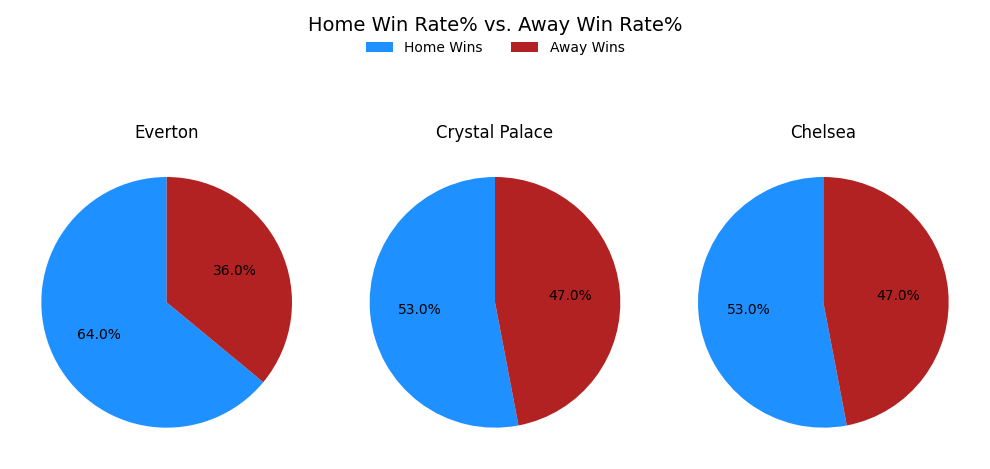

In [ ]:
hwr_team = Highest_HWR["Team"]
hwr_percentages = [Highest_HWR["HomeWin%"], Highest_HWR["AwayWin%"]]
hwr_labels = ["Home Wins", "Away Wins"]

awr_team = Highest_AWR["Team"]
awr_percentages = [Highest_AWR["HomeWin%"], Highest_AWR["AwayWin%"]]
awr_labels = ["Home Wins", "Away Wins"]

awr2_team = Highest_AWR2["Team"]
awr2_percentages = [Highest_AWR2["HomeWin%"], Highest_AWR2["AwayWin%"]]
awr2_labels = ["Home Wins", "Away Wins"]

colours = ["dodgerblue", "firebrick"]

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

axes[0].pie(hwr_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[0].set_title(hwr_team)

axes[1].pie(awr2_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[1].set_title(awr2_team)

axes[2].pie(awr_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[2].set_title(awr_team)


fig.legend(hwr_labels, loc="upper center", bbox_to_anchor=(0.5, 1), ncol=2, frameon=False, title="Home Win Rate% vs. Away Win Rate%", title_fontsize=14)

plt.tight_layout()
plt.show()

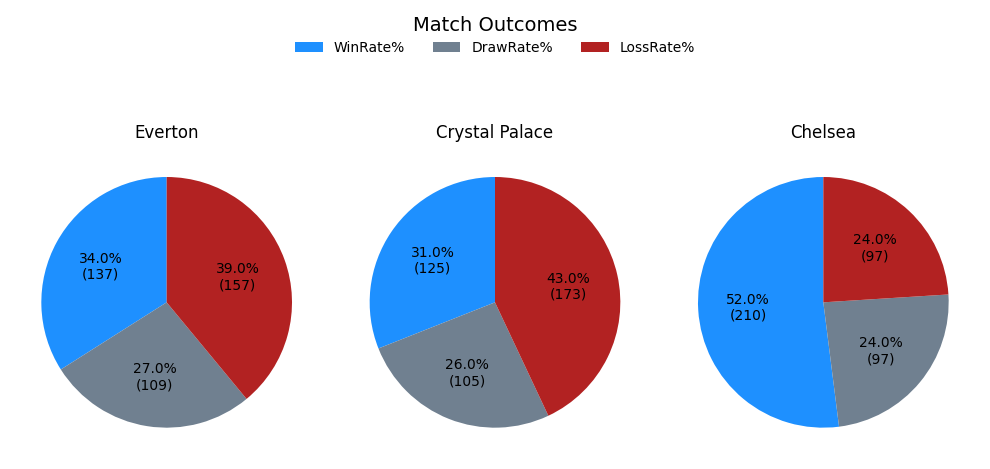

In [ ]:
hwr_team = Highest_HWR["Team"]
awr_team = Highest_AWR["Team"]
awr2_team = Highest_AWR2["Team"]

hwr_win_count = Highest_HWR["Total_Wins"]
hwr_draw_count = Highest_HWR["Draws"]
hwr_loss_count = Highest_HWR["Total_Games"] - (hwr_win_count + hwr_draw_count)

awr_win_count = Highest_AWR["Total_Wins"]
awr_draw_count = Highest_AWR["Draws"]
awr_loss_count = Highest_AWR["Total_Games"] - (awr_win_count + awr_draw_count)

awr2_win_count = Highest_AWR2["Total_Wins"]
awr2_draw_count = Highest_AWR2["Draws"]
awr2_loss_count = Highest_AWR2["Total_Games"] - (awr2_win_count + awr2_draw_count)

hwr_counts = [hwr_win_count, hwr_draw_count, hwr_loss_count]
awr_counts = [awr_win_count, awr_draw_count, awr_loss_count]
awr2_counts = [awr2_win_count, awr2_draw_count, awr2_loss_count]

hwr_percentages = [Highest_HWR["WinRate%"], Highest_HWR["DrawRate%"], Highest_HWR["LossRate%"]]
awr_percentages = [Highest_AWR["WinRate%"], Highest_AWR["DrawRate%"], Highest_AWR["LossRate%"]]
awr2_percentages = [Highest_AWR2["WinRate%"], Highest_AWR2["DrawRate%"], Highest_AWR2["LossRate%"]]

colours = ["dodgerblue", "slategrey", "firebrick"]

def autopct_format(pct, total_counts):
    total = int(round(pct * sum(total_counts) / 100.0))
    return f"{pct:.1f}%\n({total})"

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

axes[0].pie(hwr_percentages, labels=None, autopct=lambda pct: autopct_format(pct, hwr_counts), colors=colours, startangle=90)
axes[0].set_title(hwr_team)

axes[2].pie(awr_percentages, labels=None, autopct=lambda pct: autopct_format(pct, awr_counts), colors=colours, startangle=90)
axes[2].set_title(awr_team)

axes[1].pie(awr2_percentages, labels=None, autopct=lambda pct: autopct_format(pct, awr2_counts), colors=colours, startangle=90)
axes[1].set_title(awr2_team)

fig.legend(["WinRate%", "DrawRate%", "LossRate%"], loc="upper center", bbox_to_anchor=(0.5, 1), ncol=3, frameon=False, title="Match Outcomes", title_fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# Home advantage is real and you are more likely to win at Home, but it is not going to help you win at all.
# Everton had a very high Home Win Rate% and Crystal Palace had a high Away Win Rate% but both teams have
# relatively low overall Win Rate%, conversely Chelsea had the same ratio as Crystal Palace but
# performs significantly better overall. None of the top performing teams have a massively disproportionate
# Home Win Rate% vs. Away Win Rate%. Strong teams have to succeed both Home and Away.

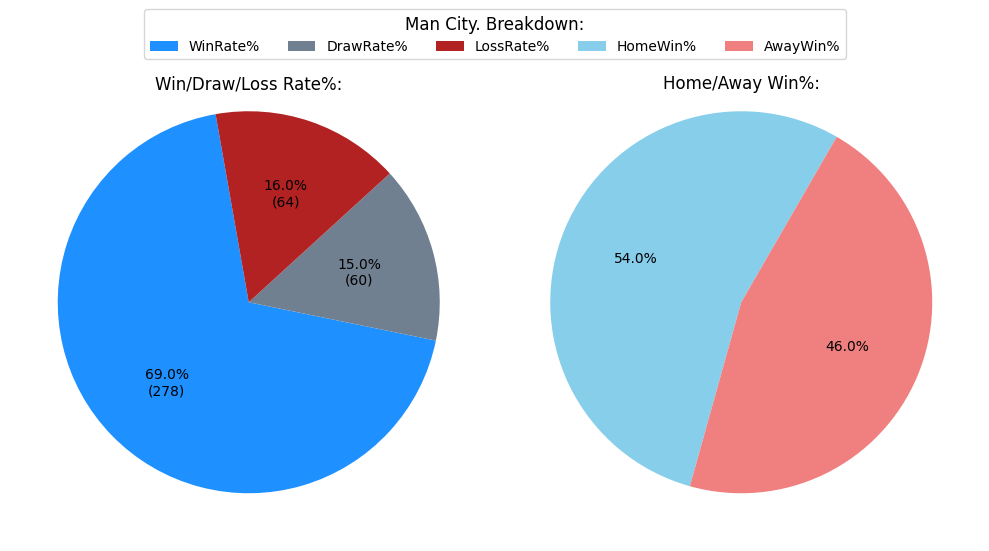

In [211]:
Man_City = Question_Two_50Wins.iloc[Question_Two_50Wins["WinRate%"].idxmax()]
Man_City
colours = ["dodgerblue", "slategrey", "firebrick"]
colours2 = ["skyblue", "lightcoral"]

team = Man_City["Team"]

win_count = Man_City["Total_Wins"]
draw_count = Man_City["Draws"]
loss_count = Man_City["Total_Games"] - (win_count + draw_count)

team_counts = [win_count, draw_count, loss_count]
match_percentages = [Man_City["WinRate%"], Man_City["DrawRate%"], Man_City["LossRate%"]]
home_away_percentages = [Man_City["HomeWin%"], Man_City["AwayWin%"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].pie(match_percentages, labels=None, autopct=lambda pct: autopct_format(pct, team_counts), colors=colours, startangle=100)
axes[0].set_title("Win/Draw/Loss Rate%:", y=0.93)

axes[1].pie(home_away_percentages, labels=None, autopct="%1.1f%%", colors=colours2, startangle=60)
axes[1].set_title("Home/Away Win%:", y=0.93)


fig.legend(["WinRate%", "DrawRate%", "LossRate%", "HomeWin%", "AwayWin%"], loc="upper center", bbox_to_anchor=(0.5, 1), ncol=5, frameon=True, title="Man City. Breakdown:", title_fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# As we can see looking at the team with the highest win rate% overall, Home and Away win rates do not tell of a teams
# ability or performance, only that teams with a high discrepancy between the two often underperform in overall win rate%